In [1]:
import numpy as nmp
import pandas as pnd



In [2]:
hepatitis_data=pnd.read_csv('hepatitis.csv')


In [3]:
hepatitis_data.head()


,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [4]:
hepatitis_data.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [5]:
result=hepatitis_data.dtypes
result

class               int64
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palable      int64
spiders             int64
ascites             int64
varices             int64
bilirubin         float64
alk_phosphate       int64
sgot                int64
albumin           float64
protime             int64
histology           int64
dtype: object

In [6]:
hepatitis_data.sum()

class               258.00
age                5796.00
sex                 157.00
steroid             215.00
antivirals          261.00
fatigue             193.00
malaise             230.00
anorexia            255.00
liver_big           259.00
liver_firm          225.00
spleen_palable      257.00
spiders             237.00
ascites             267.00
varices             267.00
bilirubin           196.38
alk_phosphate     15002.00
sgot              11858.00
albumin             543.93
protime            8762.00
histology           205.00
dtype: float64

Matplotlib is building the font cache; this may take a moment.


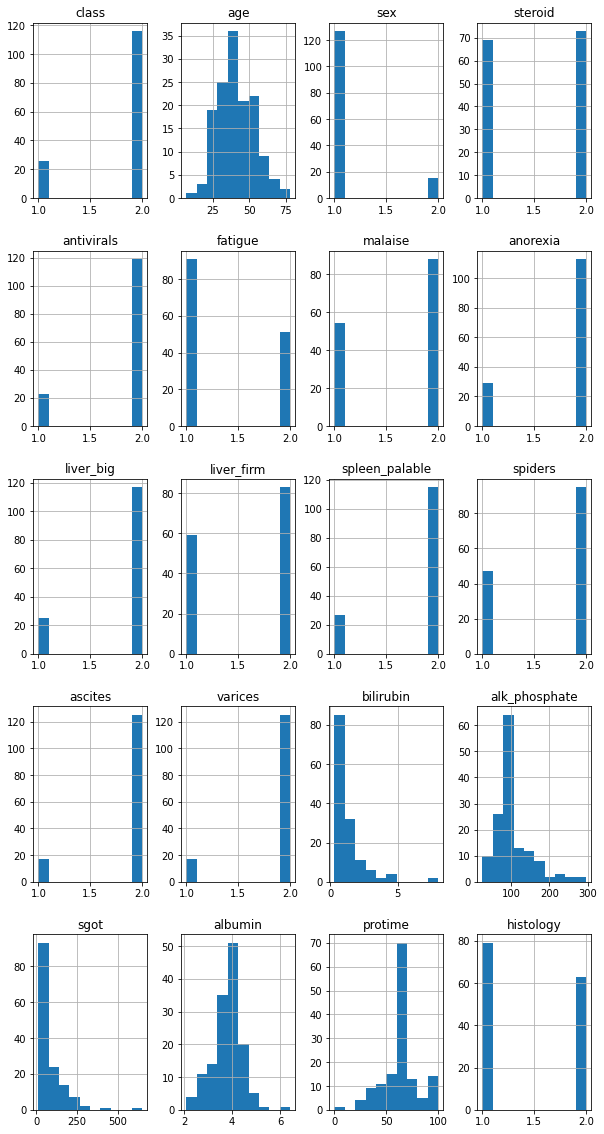

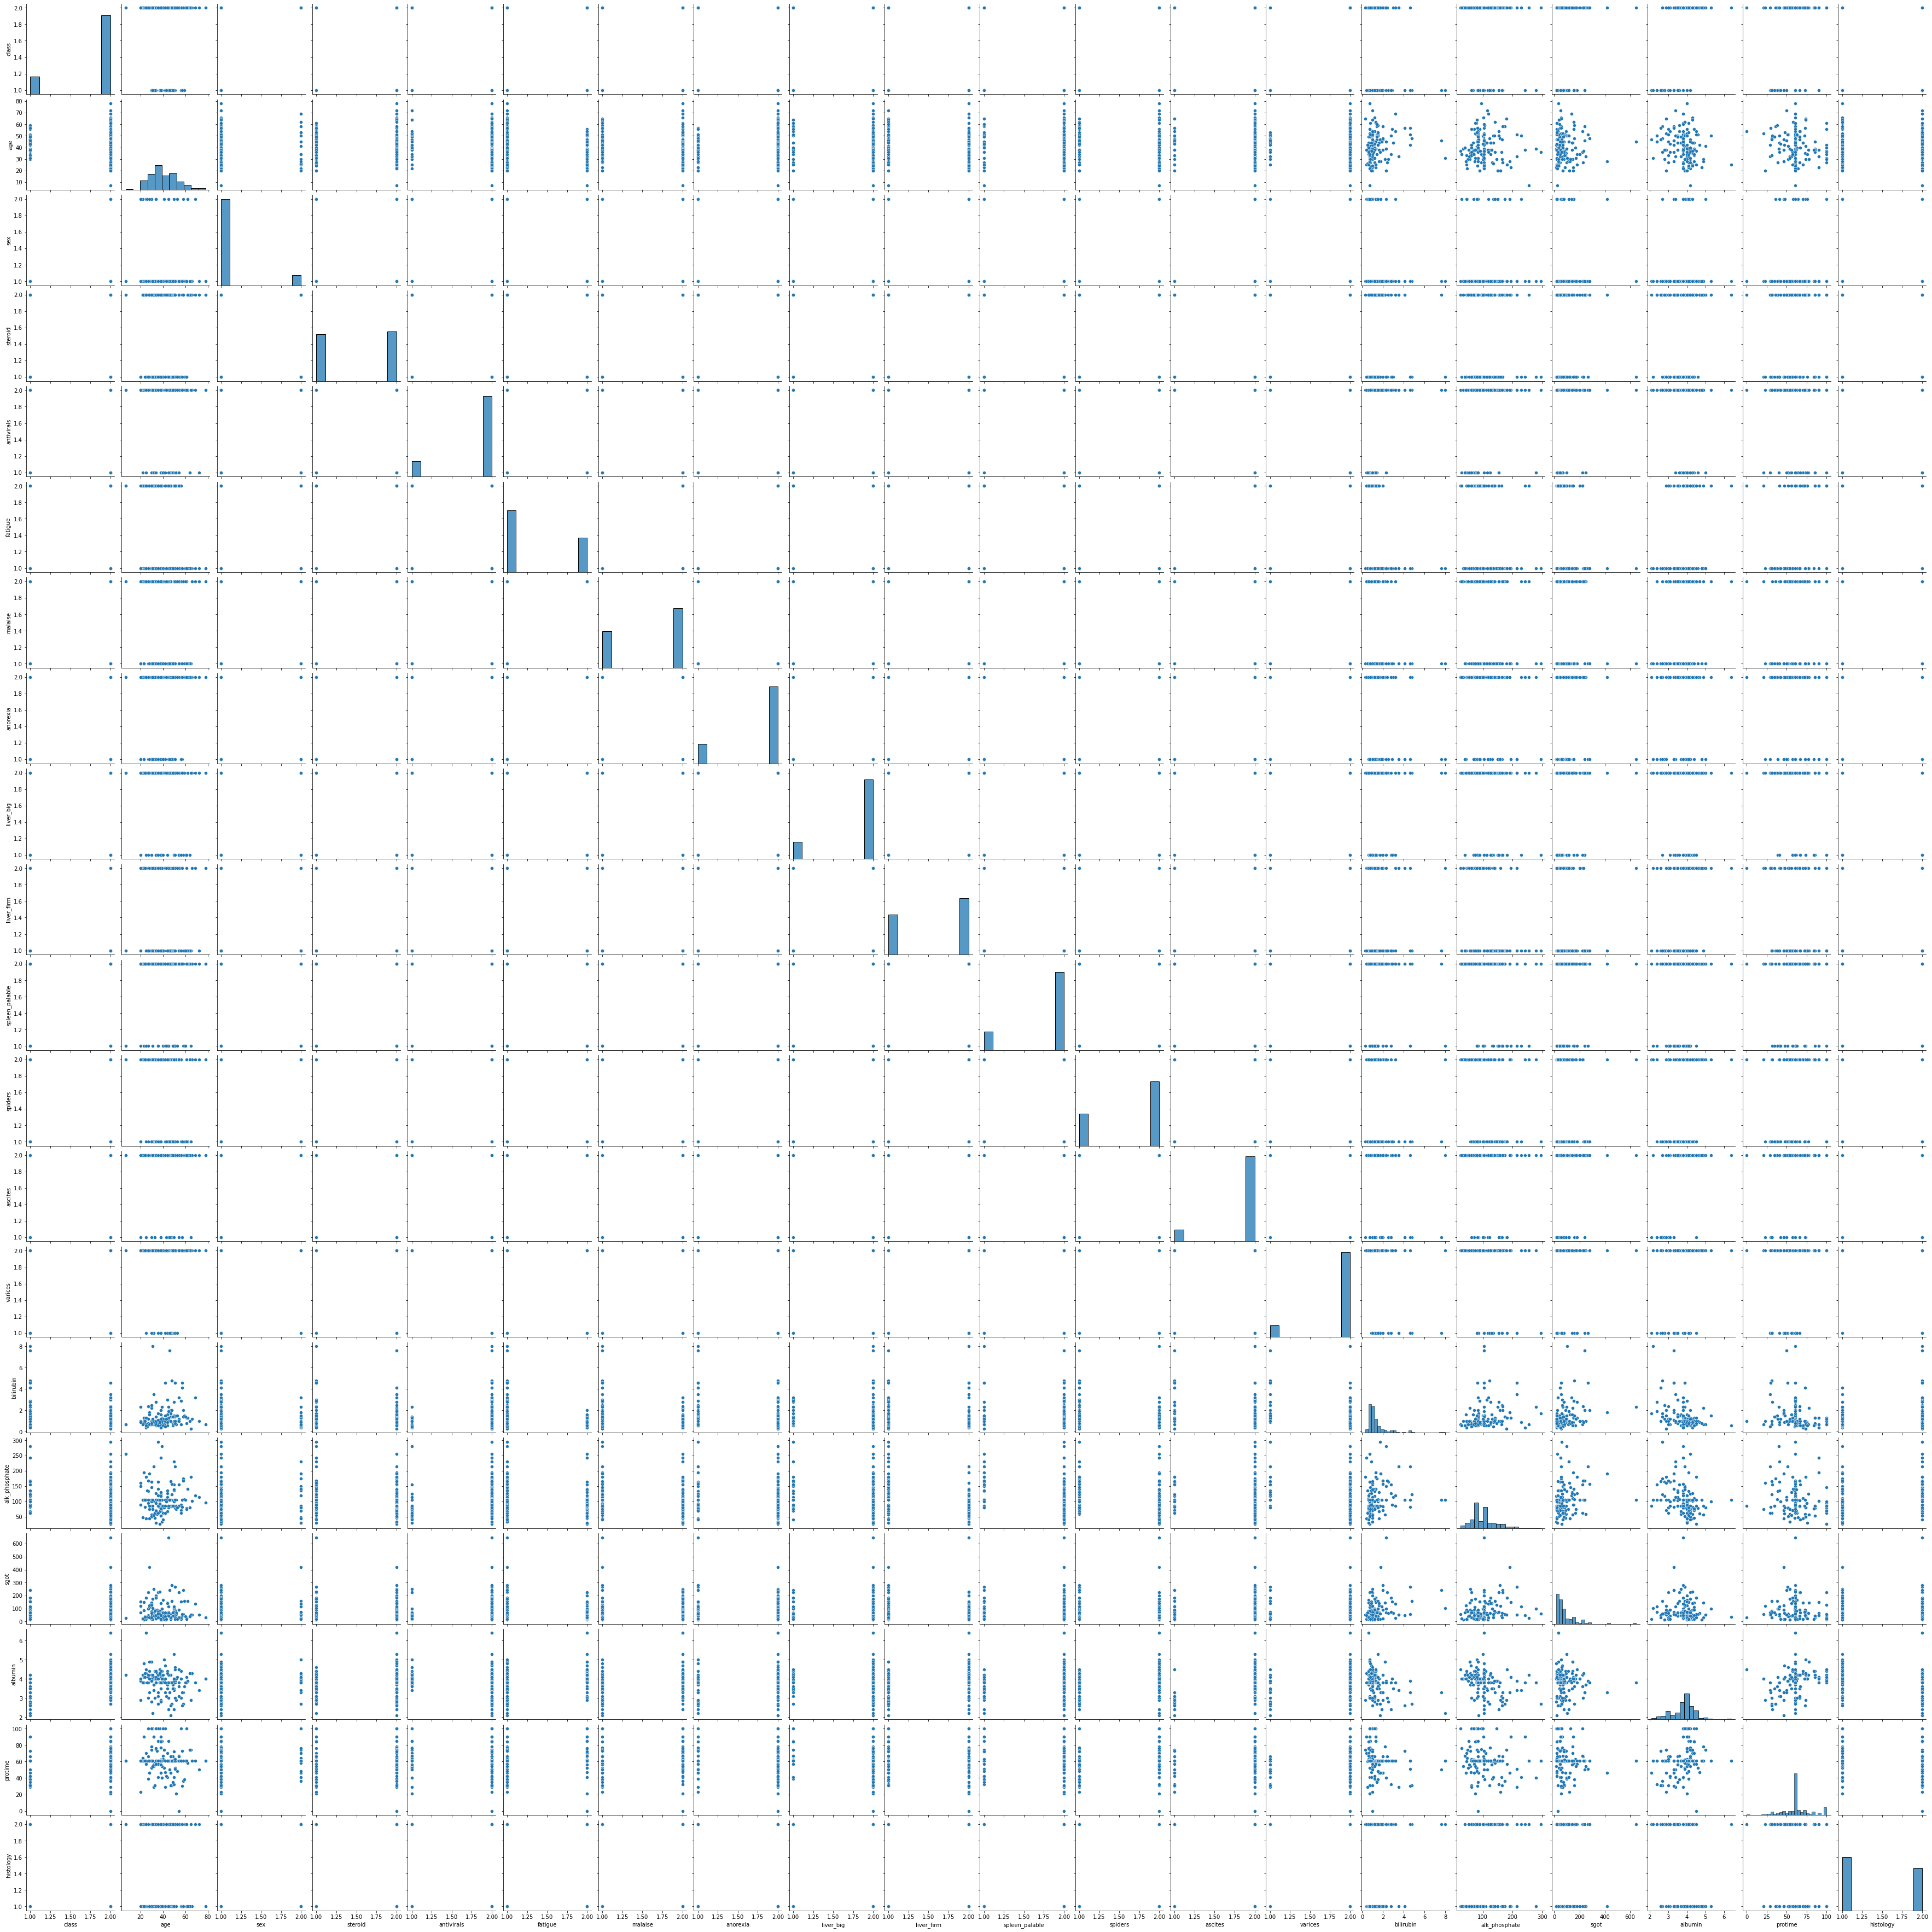

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
hepatitis_data.hist(figsize=(10,20))
sns.pairplot(hepatitis_data)

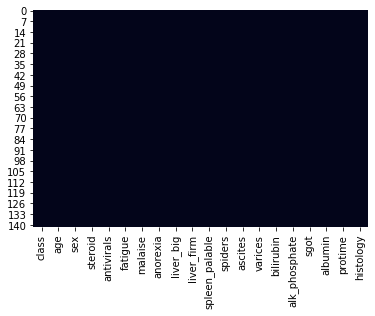

In [9]:
sns.heatmap(hepatitis_data.isnull(),cbar=False)


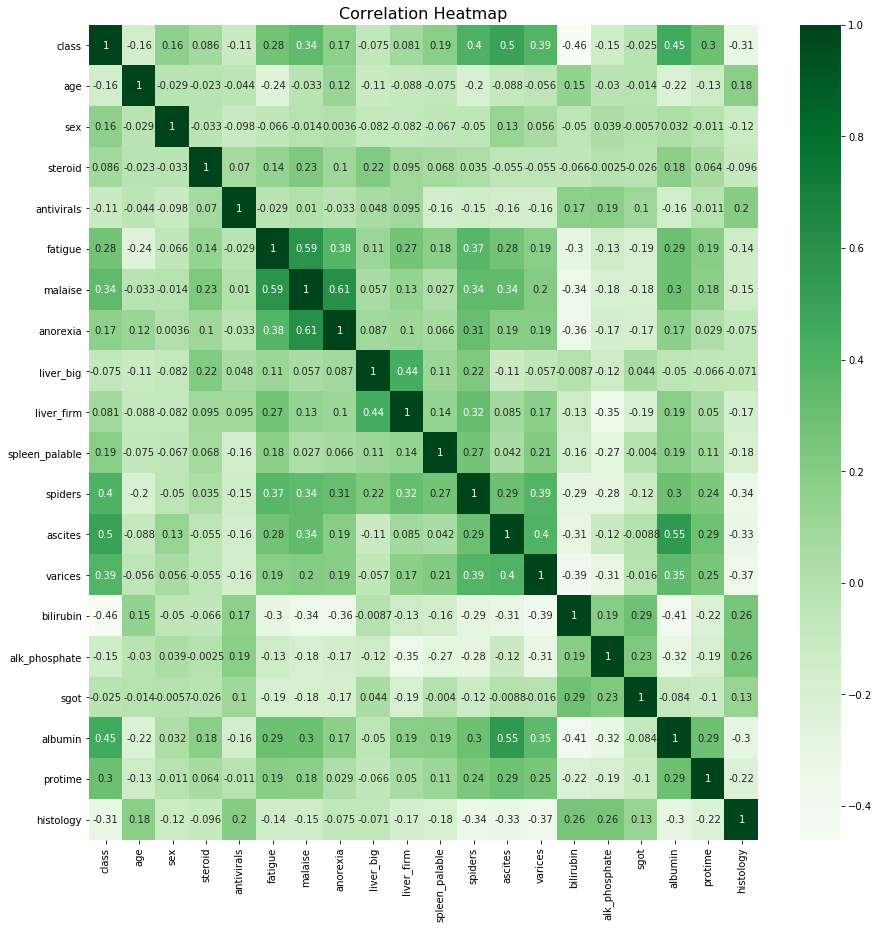

In [8]:
plt.figure(figsize=(15,15))
corr = hepatitis_data.corr()
corr.index = hepatitis_data.columns
hepatitis_data=hepatitis_data.dropna(axis=0)
sns.heatmap(corr, annot = True, cmap='Greens')
plt.title("Correlation Heatmap", fontsize=16)
plt.show() 

In [9]:
X=hepatitis_data.iloc[:,:-1].values
Y=hepatitis_data.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.13,random_state=42)

In [12]:
##Feature scaling
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()
X_train=stc.fit_transform(X_train)
X_test=stc.transform(X_test)


In [18]:
## Algorithms
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
#Naive Bayes
print("NAIVE BAYES")
navie = GaussianNB()
navie.fit(X_train,Y_train.ravel())
navie_predict_test = navie.predict(X_test)
print("Accuracy on test data: {0:.3f}".format(metrics.accuracy_score(Y_test,navie_predict_test)*100))
print("{0}".format(metrics.confusion_matrix(Y_test,navie_predict_test)))


NAIVE BAYES
Accuracy on test data: 84.211
[[11  0]
 [ 3  5]]


In [19]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
print("RANDOM FOREST CLASSIFIER")
forest = RandomForestClassifier(max_depth=3,n_estimators=100,random_state=0)
forest.fit(X_train,Y_train)
forest_predict_test = forest.predict(X_test)
print("Accuracy on test data: {0:.3f}".format(metrics.accuracy_score(Y_test, forest_predict_test)*100))
print("{0}".format(metrics.confusion_matrix(Y_test,forest_predict_test)))



RANDOM FOREST CLASSIFIER
Accuracy on test data: 84.211
[[11  0]
 [ 3  5]]


In [20]:
from sklearn.svm import SVC
##SVM 
print("State Vector Machine")
sv=SVC()
sv.fit(X_train,Y_train)
sv_predict_test = sv.predict(X_test)
print("Accuracy on test data: {0:.3f}".format(metrics.accuracy_score(Y_test, sv_predict_test)*100))
print("{0}".format(metrics.confusion_matrix(Y_test,sv_predict_test)))


State Vector Machine
Accuracy on test data: 84.211
[[10  1]
 [ 2  6]]


In [21]:
from sklearn.tree import DecisionTreeClassifier
#decision tree
print("DECISION TREE")
decision=DecisionTreeClassifier(max_depth=3,random_state=0)
decision.fit(X_train,Y_train)
decision_predict_test=decision.predict(X_test)
print("Accuracy on test data: {0:.3f}".format(metrics.accuracy_score(Y_test, decision_predict_test)*100))
print("{0}".format(metrics.confusion_matrix(Y_test,decision_predict_test)))


DECISION TREE
Accuracy on test data: 57.895
[[8 3]
 [5 3]]


In [22]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression 
print("LOGISTIC REGRESSION")
lr=LogisticRegression()
lr.fit(X_train,Y_train)
lr_predict_test = lr.predict(X_test)
print("Accuracy on test data: {0:.4f}".format(metrics.accuracy_score(Y_test, lr_predict_test)*100))
print("{0}".format(metrics.confusion_matrix(Y_test,lr_predict_test)))


LOGISTIC REGRESSION
Accuracy on test data: 84.2105
[[10  1]
 [ 2  6]]


In [26]:
m=["GaussianNB:"+"({:.2f}%)".format(metrics.accuracy_score(Y_test,navie_predict_test)*100),"RandomForest:"+"({:.2f}%)".format(metrics.accuracy_score(Y_test,forest_predict_test)*100),
   "SVC:"+"({:.2f}%)".format(metrics.accuracy_score(Y_test,sv_predict_test)*100),"DecisionForest:"+"({:.2f}%)".format(metrics.accuracy_score(Y_test,decision_predict_test)*100),
   "LogisticRegression:"+"({:.2f}%)".format(metrics.accuracy_score(Y_test,lr_predict_test)*100)]
m

['GaussianNB:(84.21%)',
 'RandomForest:(84.21%)',
 'SVC:(84.21%)',
 'DecisionForest:(57.89%)',
 'LogisticRegression:(84.21%)']

In [28]:
n=nmp.array([metrics.accuracy_score(Y_test,navie_predict_test),metrics.accuracy_score(Y_test,forest_predict_test),metrics.accuracy_score(Y_test,sv_predict_test),
            metrics.accuracy_score(Y_test,decision_predict_test),metrics.accuracy_score(Y_test,lr_predict_test)])


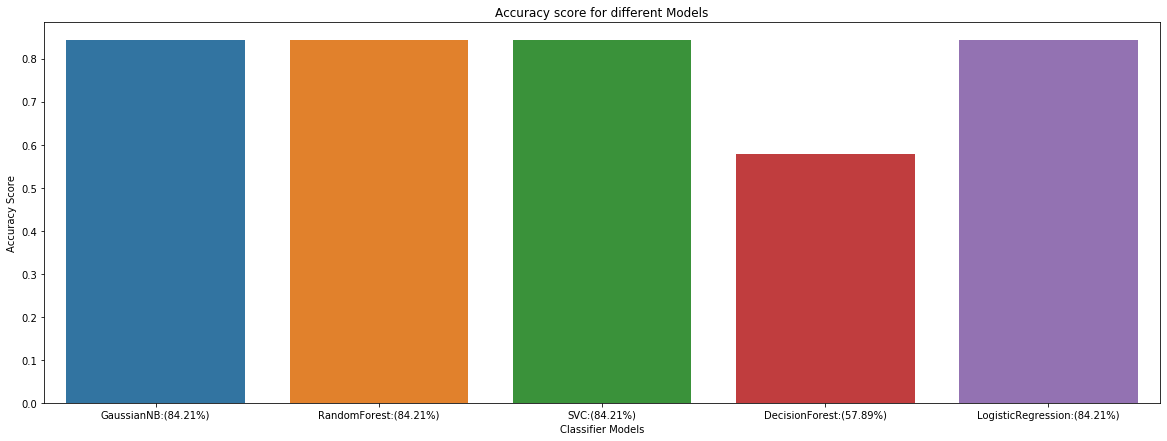

In [34]:
fig,ax=plt.subplots(figsize=(20,7))
sns.barplot(m,n)
plt.ylabel("Accuracy Score")
plt.xlabel("Classifier Models")
plt.title("Accuracy score for different Models")
plt.show()

In [1]:


import numpy as np
import pandas as pd
import warnings
from sklearn import metrics
import pickle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')
hepatitis_data=pd.read_csv('hepatitis.csv')
data=hepatitis_data.dropna(axis=0)
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
gn=GaussianNB()
gn.fit(X_train,Y_train)
gn_test=gn.predict(X_test)
print('Confusion matrix:{0}'.format(metrics.confusion_matrix(Y_test,gn_test)))
print(metrics.classification_report(Y_test,gn_test))

pickle.dump(gn,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

Confusion matrix:[[18  0]
 [ 4  7]]
              precision    recall  f1-score   support

           1       0.82      1.00      0.90        18
           2       1.00      0.64      0.78        11

    accuracy                           0.86        29
   macro avg       0.91      0.82      0.84        29
weighted avg       0.89      0.86      0.85        29

